<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Alphas/Market_Return_by_Political_Party.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

17:21:28 Starting...
17:21:28 Installing yfinance into Google notebook...
17:21:38 Installing arch into Google notebook...
17:22:01 Initialized.


# Get the Data
### Get Presidents Data

In [2]:
presidents=(p:=pd.read_html('https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States')[0]).set_index(p.columns[0]).iloc[:,[1,2,4]]
presidents['Term Begins']=presidents.iloc[:,1].apply(lambda x:pd.Period(" ".join(x.split(' ')[:3]).split("[")[0],'D'))
presidents['Term Ends']=presidents.iloc[:,1].apply(lambda x:pd.Period(" ".join(x.split(' ')[4:]).split("[")[0] if 'Incumbent' not in x else today(),'D'))
presidents['Party']=presidents.iloc[:,2].str.replace(r"\[.+\]","",regex=True)
presidents['President']=presidents[presidents.columns[0]].apply(lambda x:x.split(' (')[0])
presidents=presidents[presidents.columns[-4:]]
presidents.index.name='President'
display(presidents)

,Term Begins,Term Ends,Party,President
President,,,,
1,1789-04-30,1797-03-04,Unaffiliated,George Washington
2,1797-03-04,1801-03-04,Federalist,John Adams
3,1801-03-04,1809-03-04,Democratic- Republican,Thomas Jefferson
4,1809-03-04,1817-03-04,Democratic- Republican,James Madison
5,1817-03-04,1825-03-04,Democratic- Republican,James Monroe
6,1825-03-04,1829-03-04,Democratic- Republican National Republican,John Quincy Adams
7,1829-03-04,1837-03-04,Democratic,Andrew Jackson
8,1837-03-04,1841-03-04,Democratic,Martin Van Buren
9,1841-03-04,1841-04-04,Whig,William Henry Harrison


### Get Market Data

In [3]:
data,ticker_name=download(ticker:='^GSPC',auto_adjust=True).xs(ticker,axis=1,level=1),'S&P 500 Index'
data['Return']=data['Close'].pct_change()*hundred
data.columns.name=ticker_name
data.dropna(inplace=True)
data.index=list(map(lambda x:pd.Period(x,'D'),data.index))
display(data)

[*********************100%***********************]  1 of 1 completed


S&P 500 Index,Close,High,Low,Open,Volume,Return
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0.566254
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,-0.225230
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,-0.959368
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0.626784
1928-01-09,17.500000,17.500000,17.500000,17.500000,0,-0.906001
...,...,...,...,...,...,...
2025-03-31,5611.850098,5627.560059,5488.729980,5527.910156,5257250000,0.553852
2025-04-01,5633.069824,5650.569824,5558.520020,5597.529785,4434500000,0.378124
2025-04-02,5670.970215,5695.310059,5571.479980,5580.759766,4243830000,0.672819
2025-04-03,5396.520020,5499.529785,5390.830078,5492.740234,7210470000,-4.839563


### Make a Ribbon Candy Plot

17:22:10 Wrote figure to Level of S&P 500 Index and Presidential Party.png.


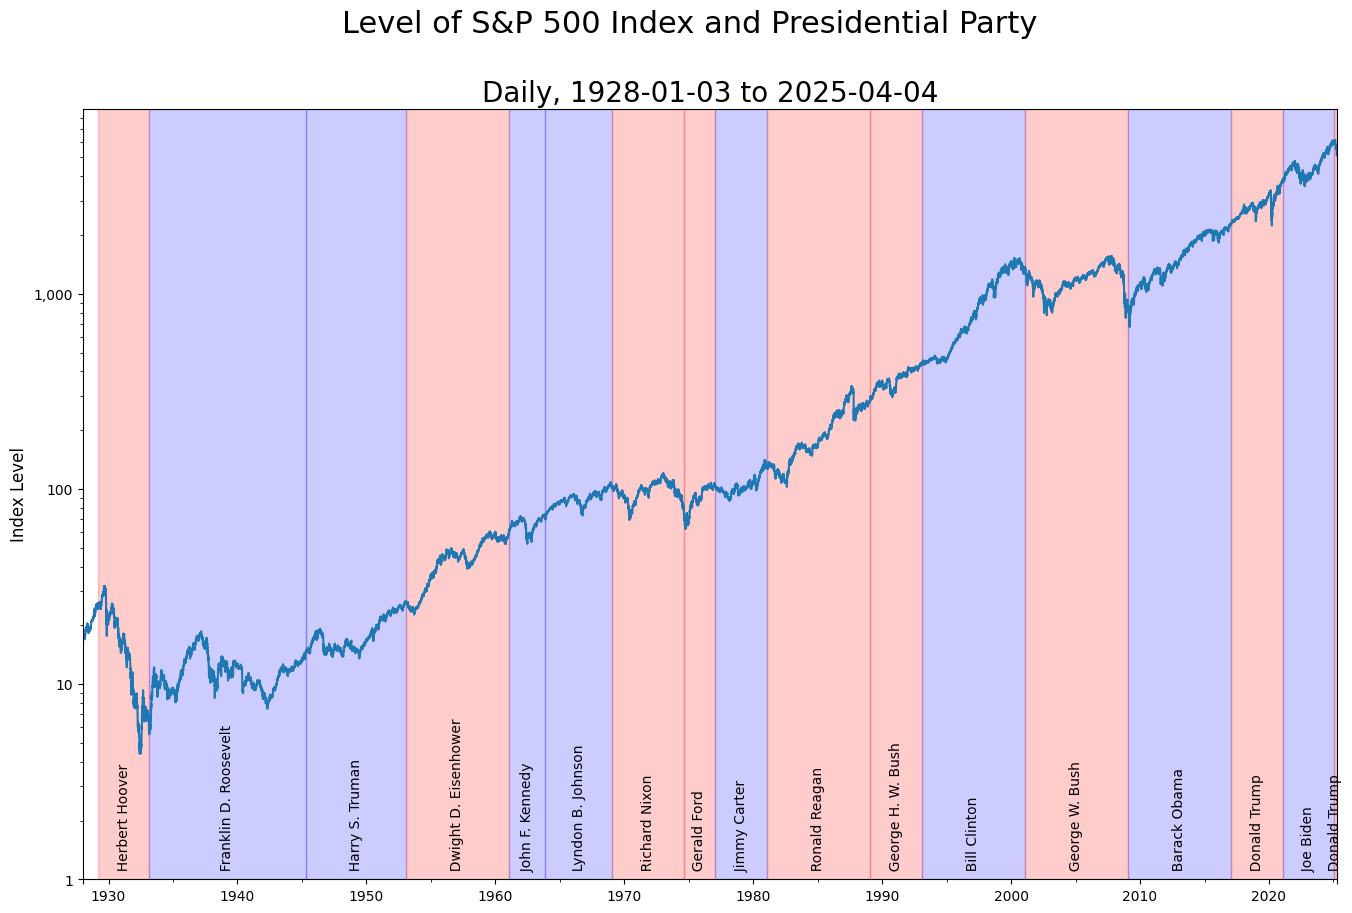

In [4]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
data['Close'].plot(ax=plot)
plot.set_yscale('log')
plot.yaxis.set_major_formatter(CountLabels())
plot.set_ylabel('Index Level',fontsize=12)

for president in [p for p in presidents.index if presidents.loc[p,'Term Begins']>data.index[0]]:
    plot.axvspan(start:=presidents.loc[president,'Term Begins'],end:=presidents.loc[president,'Term Ends'],
                 color='blue' if presidents.loc[president,'Party']=='Democratic' else 'red',alpha=0.2)
    plot.text(xa:=(start+(end-start).n//2),ya:=one,"  "+presidents.loc[president,"President"],ha='center',va='bottom',rotation=90)

plot.set_ylim(ya,None)
figure.suptitle(title:="Level of %s and Presidential Party" % ticker_name,fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s" % (data.index[0].strftime("%Y-%m-%d"),data.index[-1].strftime("%Y-%m-%d")),fontsize=20)
figure.savefig(filename:=title+".png",dpi=300,bbox_inches='tight')
nprint("Wrote figure to %s." % filename)

### Merge the Data and Perform Classic $t$ Test and ANOVA Analysis

In [6]:
from scipy.stats import t as tdensity
from statsmodels.formula.api import ols as OLSformula
from statsmodels.stats.anova import anova_lm

merged=presidents.set_index('Term Begins').merge(data,left_index=True,right_index=True,how='outer').ffill().dropna().drop(columns='Term Ends',axis=1)
merged.index.name='Date'
display(merged)

try:
    merged.to_csv(filename:='/content/drive/MyDrive/presidents.csv')
    nprint("Wrote data to %s." % filename)

except:
    nprint("Could not write data to Google drive.")

nprint("t Test for Zero Mean")
groups=merged[['Party','Return']].groupby('Party')
grouped=groups.count().rename(columns={'Return':'Sample'})
grouped['Mean']=groups.mean()
grouped['Std.Dev.']=groups.std()
grouped['Variance']=groups.var()
grouped['Std.Err.']=np.sqrt(grouped['Variance']/grouped['Sample'])
grouped['t Statistic']=grouped['Mean']/grouped['Std.Err.']
grouped['p Value']=list(map(lambda x:min([x,one-x])*two,list(tdensity.cdf(grouped['t Statistic'],grouped['Sample']-one))))
grouped['Significance']=grouped['p Value'].apply(lambda x:'***' if x<=0.001 else '**' if x<=0.01 else '*' if x<0.05 else '')
grouped.index.name='Groups'
display(grouped.sort_values("p Value"))

nprint("One Way ANOVA Analysis")
fit=OLSformula("Return ~ Party",merged).fit()
anova=anova_lm(fit,typ=2).rename(columns={'sum_sq':'Sum of Squares','df':'d.o.f.','PR(>F)':'p Value','F':'F Statistic'})
anova['Significance']=anova['p Value'].apply(lambda x:'***' if x<=0.001 else '**' if x<=0.01 else '*' if x<0.05 else '')
anova.index=['Between Groups','Within Groups']
anova.index.name='Variation'
display(anova.replace(np.nan,""))

,Party,President,Close,High,Low,Open,Volume,Return
Date,,,,,,,,
1928-01-03,Republican,Calvin Coolidge,17.760000,17.760000,17.760000,17.760000,0.000000e+00,0.566254
1928-01-04,Republican,Calvin Coolidge,17.719999,17.719999,17.719999,17.719999,0.000000e+00,-0.225230
1928-01-05,Republican,Calvin Coolidge,17.549999,17.549999,17.549999,17.549999,0.000000e+00,-0.959368
1928-01-06,Republican,Calvin Coolidge,17.660000,17.660000,17.660000,17.660000,0.000000e+00,0.626784
1928-01-09,Republican,Calvin Coolidge,17.500000,17.500000,17.500000,17.500000,0.000000e+00,-0.906001
...,...,...,...,...,...,...,...,...
2025-03-31,Republican,Donald Trump,5611.850098,5627.560059,5488.729980,5527.910156,5.257250e+09,0.553852
2025-04-01,Republican,Donald Trump,5633.069824,5650.569824,5558.520020,5597.529785,4.434500e+09,0.378124
2025-04-02,Republican,Donald Trump,5670.970215,5695.310059,5571.479980,5580.759766,4.243830e+09,0.672819


17:30:33 Wrote data to /content/drive/MyDrive/presidents.csv.
17:30:33 t Test for Zero Mean


,Sample,Mean,Std.Dev.,Variance,Std.Err.,t Statistic,p Value,Significance
Groups,,,,,,,,
Democratic,12998,0.043842,1.120798,1.256188,0.009831,4.459698,0.000008,***
Republican,11435,0.015346,1.271518,1.616759,0.011891,1.290564,0.196881,


17:30:33 One Way ANOVA Analysis


,Sum of Squares,d.o.f.,F Statistic,p Value,Significance
Variation,,,,,
Between Groups,4.940018,1.0,3.466826,0.062623,
Within Groups,34812.702008,24431.0,,,


## Model with Non-Normal Asymmetric GARCH
### Baseline OLS Regression with Indicator Variables (Normal Homoskedastic Innovations)

In [18]:
from statsmodels.regression.linear_model import OLS

nprint("Baseline OLS regression with indicator variables. This should produce *exactly* the same results as the conditional means above.")
display(design:=pd.get_dummies(merged['Party'],columns=['Party'],dtype=float).merge(merged['Return'],left_index=True,right_index=True))
fit=OLS(design['Return'],design.drop('Return',axis=1)).fit()
nprint(fit.summary())

17:43:36 Baseline OLS regression with indicator variables. This should produce *exactly* the same results as the conditional means above.


,Democratic,Republican,Return
Date,,,
1928-01-03,0.0,1.0,0.566254
1928-01-04,0.0,1.0,-0.225230
1928-01-05,0.0,1.0,-0.959368
1928-01-06,0.0,1.0,0.626784
1928-01-09,0.0,1.0,-0.906001
...,...,...,...
2025-03-31,0.0,1.0,0.553852
2025-04-01,0.0,1.0,0.378124
2025-04-02,0.0,1.0,0.672819


17:43:36                             OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.467
Date:                Fri, 04 Apr 2025   Prob (F-statistic):             0.0626
Time:                        17:43:36   Log-Likelihood:                -38994.
No. Observations:               24433   AIC:                         7.799e+04
Df Residuals:                   24431   BIC:                         7.801e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Democratic     0.0438      0.010      4.187

### Now Fit a "Vanilla" Asymmetric GARCH Model with Non-Normal Innovations

In [80]:
from scipy.stats import norm

nprint("Fitting GJR-GARCH(1,1,1) Model with GED Innovations")
model=ARX(design["Return"],design.drop('Return',axis=1),constant=False)
model.volatility=GARCH2(1,1,1)
model.distribution=GeneralizedError2()
fit=model.fit(update_freq=0)
nprint(fit.summary())

results=pd.DataFrame({'Estimate':fit.params,'Std.Err.':fit.std_err,'Null Value':[zero]*2+[np.nan]*4+[two]})
results['t Score']=(results['Estimate']-results['Null Value'])/results['Std.Err.']
results['p Value']=list(map(lambda x:min(norm.cdf(x),norm.sf(x))*two,results['t Score']))
display(results.replace(np.nan,""))
nprint("Z Score for Drift Coeficient Difference: {:.2f}".format(Z:=(results.loc[results.index[1],'Estimate']-results.loc[results.index[0],'Estimate'])/(results.head(2)['Std.Err.']**two).sum()**half))

19:02:27 Fitting GJR-GARCH(1,1,1) Model with GED Innovations
Optimization terminated successfully    (Exit mode 0)
            Current function value: 31446.27148289407
            Iterations: 20
            Function evaluations: 185
            Gradient evaluations: 20
19:02:28                               AR-X - GJR-GARCH Model Results                              
Dep. Variable:                             Return   R-squared:                      -0.000
Mean Model:                                  AR-X   Adj. R-squared:                 -0.000
Vol Model:                              GJR-GARCH   Log-Likelihood:               -31446.3
Distribution:      Generalized Error Distribution   AIC:                           62906.5
Method:                        Maximum Likelihood   BIC:                           62963.3
                                                    No. Observations:                24433
Date:                            Fri, Apr 04 2025   Df Residuals:                  

,Estimate,Std.Err.,Null Value,t Score,p Value
Democratic,0.048193,0.006297,0.0,7.653605,0.0
Republican,0.049270,0.005385,0.0,9.148828,0.0
omega,0.010163,0.001402,,,
alpha[1],0.032754,0.004085,,,
gamma[1],0.100681,0.008933,,,
beta[1],0.908684,0.006548,,,
nu,1.307607,0.022717,2.0,-30.478483,0.0


19:02:28 Z Score for Drift Coeficient Difference: 0.13
